In [73]:
import numpy as np

In [74]:
import pandas as pd

In [75]:
from scipy import stats

In [76]:
import matplotlib as plt

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
import sqlite3

In [79]:
import pprint

In [80]:
# load CSV data to Pandas
df = pd.read_csv('insurance.csv')

In [81]:
# connect to SQLite database
conn = sqlite3.connect('insurance.db')

In [82]:
# write the data to a SQLite table
df.to_sql('customer', conn, if_exists='replace', index=True)

1338

In [83]:
# create a cursor database
cur = conn.cursor()

In [84]:
rows = [row for row in cur.execute('SELECT * FROM customer')]

In [85]:
pprint.pprint(rows[0:10])

[(0, 19, 'female', 27.9, 0, 'yes', 'southwest', 16884.924),
 (1, 18, 'male', 33.77, 1, 'no', 'southeast', 1725.5523),
 (2, 28, 'male', 33.0, 3, 'no', 'southeast', 4449.462),
 (3, 33, 'male', 22.705, 0, 'no', 'northwest', 21984.47061),
 (4, 32, 'male', 28.88, 0, 'no', 'northwest', 3866.8552),
 (5, 31, 'female', 25.74, 0, 'no', 'southeast', 3756.6216),
 (6, 46, 'female', 33.44, 1, 'no', 'southeast', 8240.5896),
 (7, 37, 'female', 27.74, 3, 'no', 'northwest', 7281.5056),
 (8, 37, 'male', 29.83, 2, 'no', 'northeast', 6406.4107),
 (9, 60, 'female', 25.84, 0, 'no', 'northwest', 28923.13692)]


In [86]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [87]:
# Now the means

In [88]:
round(df['age'].mean(), 2)

39.21

In [89]:
round(df['bmi'].mean(), 2)

30.66

In [90]:
round(df['children'].mean(), 2)

1.09

In [91]:
round(df['charges'].mean(), 2)

13270.42

In [92]:
# Now the medians

In [93]:
round(df['age'].median(), 2)

39.0

In [94]:
round(df['bmi'].median(), 2)

30.4

In [95]:
round(df['children'].median(), 2)

1.0

In [96]:
round(df['charges'].median(), 2)

9382.03

In [97]:
# The difference between df[x].mean() and df[x].median() seems small for each variable
# Is this a very normally distributed data set?

In [98]:
from matplotlib import pyplot as plt

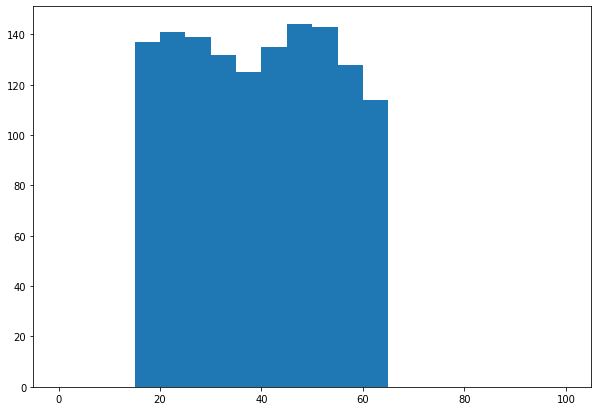

In [99]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(df['age'], bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
# Show plot
plt.show()

In [100]:
# The age histogram seems uniformly distributed

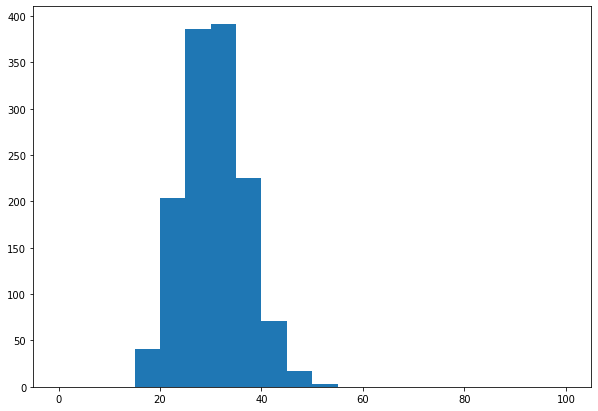

In [101]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(df['bmi'], bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
# Show plot
plt.show()

In [102]:
# BMI seems more normally distributed, with a strong central tendency with little variability

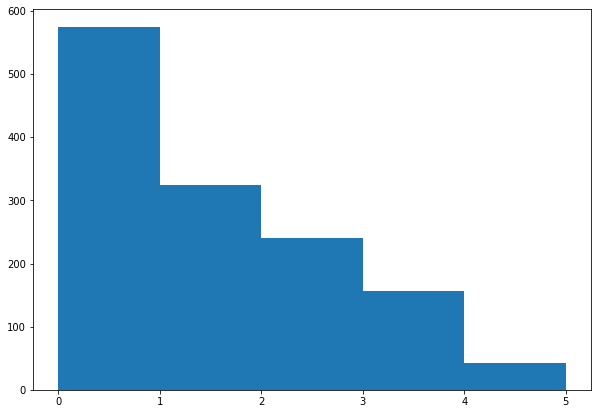

In [103]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(df['children'], bins = [0, 1, 2, 3, 4, 5])
# Show plot
plt.show()

In [104]:
df['children'].max()

5

In [105]:
# seems to be normally distributed and strongly rightly skewed

In [106]:
bins = [x for x in range(0, 65000, 1500)]

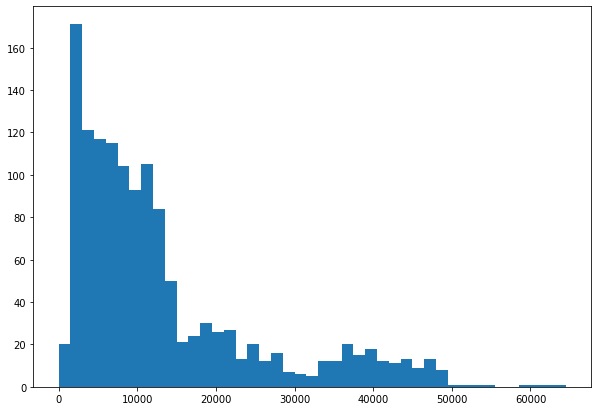

In [107]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(df['charges'], bins)
# Show plot
plt.show()

In [108]:
round(df['charges'].max(), 2)

63770.43

In [109]:
round(df['charges'].min(), 2)

1121.87

In [110]:
# seems to be normally distributed and strongly rightly skewed

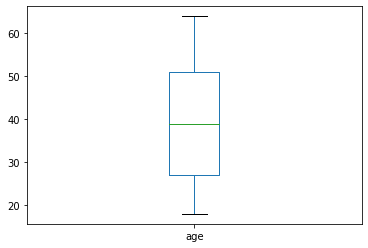

In [111]:
boxplot = df.boxplot(grid=False, column=['age']) 

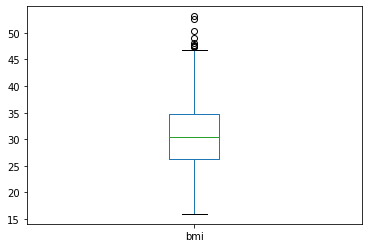

In [112]:
boxplot = df.boxplot(grid=False, column=['bmi']) 

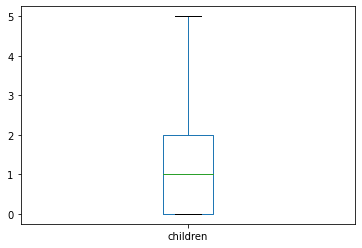

In [113]:
boxplot = df.boxplot(grid=False, column=['children']) 

In [114]:
# there are no outliers but the mean is 1 and the 100 percentile is 5

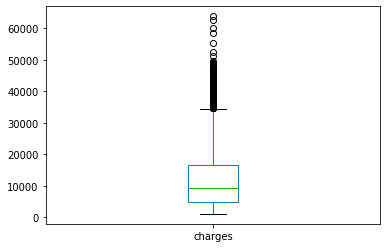

In [115]:
boxplot = df.boxplot(grid=False, column=['charges']) 

In [116]:
# there are many outiers for charges. 100 percentuke seems to be approx 35000, and max to be approx 65000

In [117]:
round(stats.trim_mean(df[['age']], 0.05)[0], 2)

39.06

In [118]:
round(stats.trim_mean(df[['bmi']], 0.05)[0], 2)

30.55

In [119]:
round(stats.trim_mean(df[['children']], 0.05)[0], 2)

1.0

In [120]:
round(stats.trim_mean(df[['charges']], 0.05)[0], 2)

12086.09

In [121]:
# The use of a trimmed mean helps eliminate the influence of outliers or data points on the tails that may unfairly affect the traditional or arithmetic mean.

In [122]:
df['age'].mode()[0]

18

In [123]:
df['bmi'].mode()[0]

32.3

In [124]:
df['children'].mode()[0]

0

In [125]:
round(df['charges'].mode()[0], 2)

1639.56

In [126]:
# now we move onto variability

In [127]:
round(df['age'].var(), 2)

197.4

In [128]:
round(df['age'].std(), 2)

14.05

In [129]:
round(df['bmi'].var(), 2)

37.19

In [130]:
round(df['bmi'].std(), 2)

6.1

In [131]:
round(df['children'].var(), 2)

1.45

In [132]:
round(df['children'].std(), 2)

1.21

In [133]:
round(df['charges'].var(), 2)

146652372.15

In [134]:
round(df['charges'].std(), 2)

12110.01

In [135]:
df['age'].max() - df['age'].min()

46

In [136]:
df['bmi'].max() - df['bmi'].min()

37.17

In [137]:
df['children'].max() - df['children'].min()

5

In [138]:
round(df['charges'].max() - df['charges'].min(), 2)

62648.55

In [139]:
round(df['region'].max() - df['region'].min(), 2)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [140]:
# we calulated the range, another method to measure spread

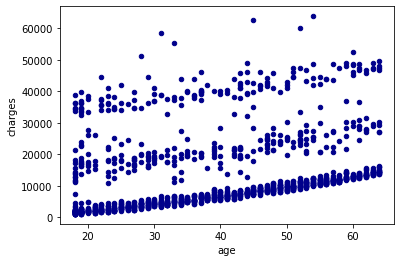

In [141]:
ax1 = df.plot.scatter(x='age',
...                       y='charges',
...                       c='DarkBlue')

In [142]:
# seems to be a slight positive relationship between age and charges

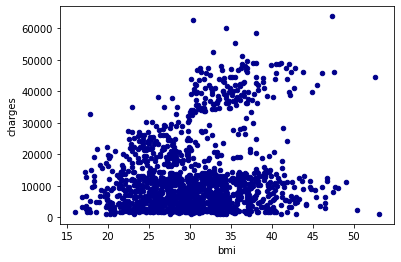

In [143]:
ax1 = df.plot.scatter(x='bmi',
...                       y='charges',
...                       c='DarkBlue')

In [144]:
# seems to be a slight positive relationship between bmi and charges

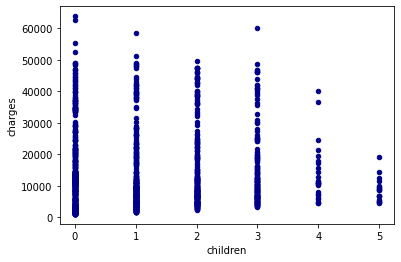

In [145]:
ax1 = df.plot.scatter(x='children',
...                       y='charges',
...                       c='DarkBlue')

In [146]:
# seems to be a slight negative relationship between children and charges

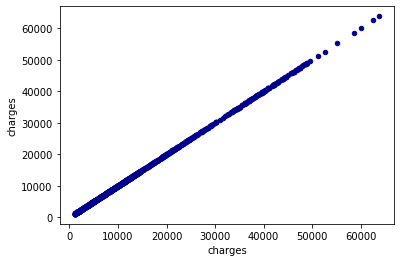

In [147]:
ax1 = df.plot.scatter(x='charges',
...                       y='charges',
...                       c='DarkBlue')

In [148]:
# a perfect relationship between charges and charges

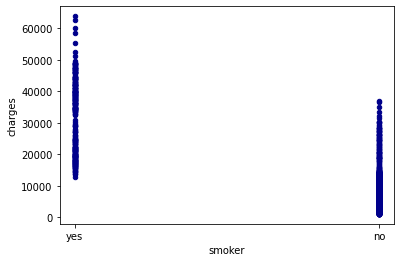

In [149]:
ax1 = df.plot.scatter(x='smoker',
...                       y='charges',
...                       c='DarkBlue')

In [150]:
# seems to be a slight negative relationship between smoker and charges

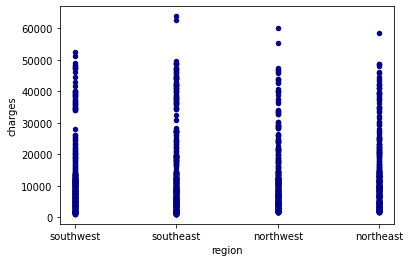

In [151]:
ax1 = df.plot.scatter(x='region',
...                       y='charges',
...                       c='DarkBlue')

In [152]:
# seems to be no relationship between region and charges

In [153]:
x = np.array(df['age']).reshape(-1,1)

In [154]:
y = np.array(df['charges'])

In [155]:
model = LinearRegression()

model.fit(x, y)

In [156]:
model = LinearRegression().fit(x, y)

In [157]:
r_sq = model.score(x, y)

In [158]:
print (round(r_sq, 2))

0.09


In [159]:
# 9% of the variance found in charges is due to the variable age

In [160]:
print('intercept:', round(model.intercept_, 2))

intercept: 3165.89


In [161]:
print('slope:', round(model.coef_[0], 2))

slope: 257.72


In [162]:
x = np.array(df['bmi']).reshape(-1,1)

In [163]:
y = np.array(df['charges'])

In [164]:
model = LinearRegression()

In [165]:
model = LinearRegression().fit(x, y)

In [166]:
r_sq = model.score(x, y)

In [167]:
print (round(r_sq, 2))

0.04


In [168]:
# 4% of the variance found in charges is due to the variable bmi

In [169]:
print('intercept:', round(model.intercept_, 2))

intercept: 1192.94


In [170]:
print('slope:', round(model.coef_[0], 2))

slope: 393.87


In [171]:
x = np.array(df['children']).reshape(-1,1)

In [172]:
y = np.array(df['charges'])


In [173]:
model = LinearRegression()

In [174]:
model = LinearRegression().fit(x, y)

In [175]:
r_sq = model.score(x, y)

In [176]:
print (round(r_sq, 2))

0.0


In [177]:
# 0% of the variability of charges is from the variable children
# There is no need to investigate this simple regression model forward

In [178]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [179]:
# the greatet correlation with charges is age with .30 correlation